# Can we predict the house price?
 ## End to End Data science

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
house = pd.read_csv('housing.csv')

In [3]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# let's take a quick look at the data structure
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We seem to have pretty clean dataset except for the attribute, 'total_bedroom' , which has some missing value

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

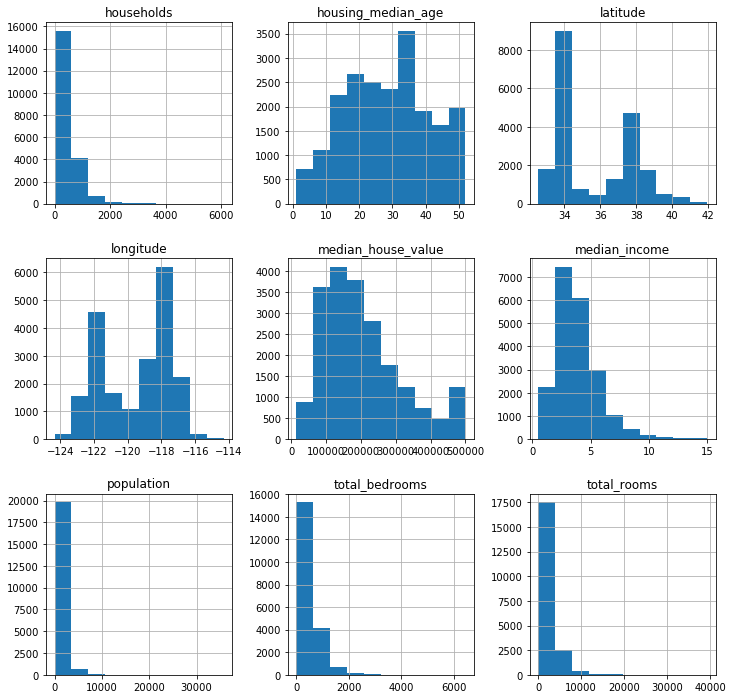

In [5]:
# Let's take a quick look at all the numerical featurs
print(house.describe())
house.hist(figsize= (12,12));

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


C:\Users\navne\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':


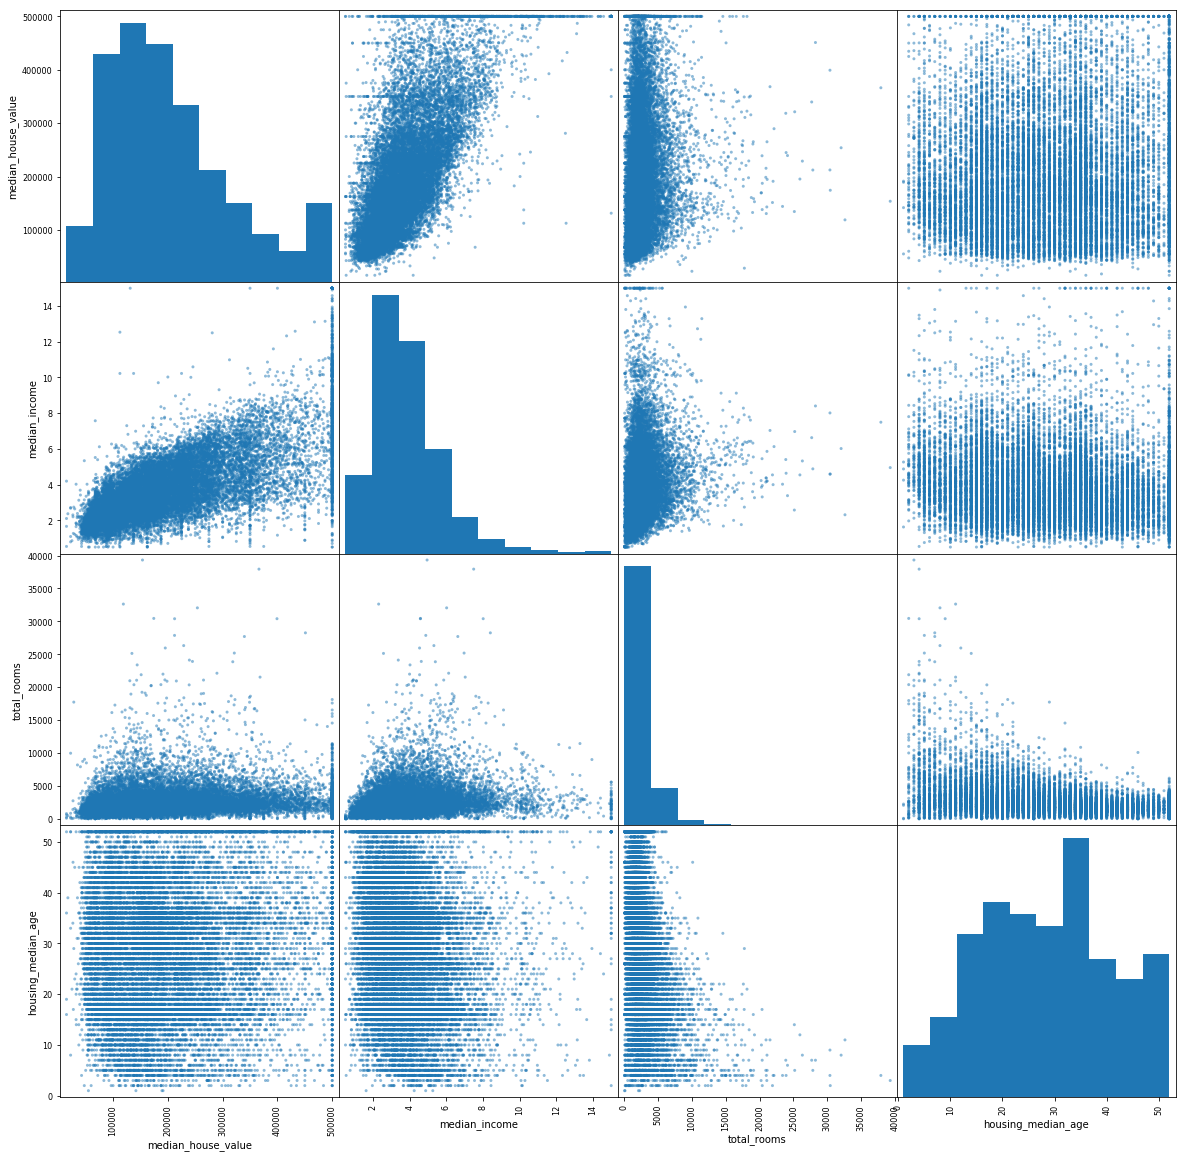

In [6]:
# Before splitting the data into test and train set, let's first look at the correlation matrix to 
#get a sense of the important attributes
corr_matrix = house.corr()
# let's see how everything compares to median_house_value
print(corr_matrix['median_house_value'].sort_values(ascending = False))

from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(house[attributes], figsize = (20,20));

Clearly median_income is highly correlated. 
We will be doing stratified sampling to divide the data into train-test.
We want to ensure that test set is representative of various categories of income.

So, we need to make an income category attribute 


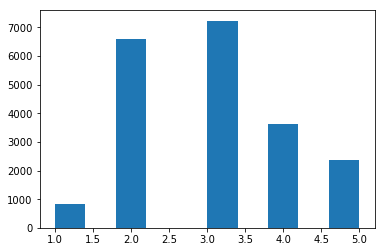

In [7]:
import numpy as np
house_income_cat = np.ceil(house['median_income']/1.5)
for i in range(len(house_income_cat)):
    if house_income_cat[i] > 5:
        house_income_cat[i] = 5
house['income_cat'] = house_income_cat
plt.hist(house_income_cat) ;       

Let's Split the data into test and train

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(house, house["income_cat"]):
    strat_train_set = house.loc[train_index]
    strat_test_set = house.loc[test_index]

In [9]:
# Let's check if our planned train-test split worked or not
print('In test Set \n')
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
print('In entire data \n')
print(house["income_cat"].value_counts() / len(house))

In test Set 

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64
In entire data 

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64


In [10]:
# Stratified sampling has worked, Let's drop income_cat from both train & test
strat_test_set.drop(['income_cat'],axis=1, inplace = True)
strat_train_set.drop(['income_cat'],axis =1, inplace = True)

In [11]:
print(strat_test_set.columns)
print(strat_train_set.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


### Let's Visualise the data

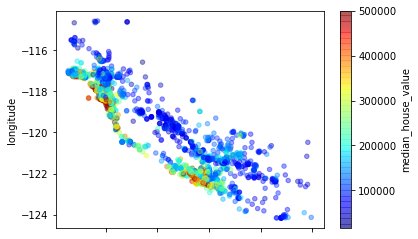

In [12]:
strat_test_set.plot(kind= 'scatter', x = 'latitude', y = 'longitude', c ='median_house_value', alpha = 0.4, cmap = plt.get_cmap('jet') )

In [13]:
strat_test_set.ocean_proximity.value_counts()

<1H OCEAN     1860
INLAND        1288
NEAR OCEAN     534
NEAR BAY       443
ISLAND           3
Name: ocean_proximity, dtype: int64

# # Prepare the data for Machine Learning algorithms

In [14]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [15]:
housing[housing.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [16]:
from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
housing_num = housing.drop('ocean_proximity', axis=1)    
num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]




from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


In [17]:
housing_prepared = num_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.63621141,
        -0.42069842, -0.61493744],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.99833135,
        -1.02222705,  1.33645936],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.43363936,
        -0.0933178 , -0.5320456 ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.60790363,
         0.71315642, -0.3167053 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.05717804,
        -0.37545069,  0.09812139],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.13515931,
         0.3777909 , -0.15779865]])

In [18]:
one_hot_encoded_training_predictors = (pd.get_dummies(housing["ocean_proximity"])).as_matrix()

In [59]:
one_hot_encoded_training_predictors_dataframe  = (pd.get_dummies(housing["ocean_proximity"]))

In [19]:
house_train = np.concatenate((housing_prepared,one_hot_encoded_training_predictors),  axis=1)
# housing_labels is name of target

In [20]:
# Applying same transforms for Test
housing_test = strat_test_set.drop("median_house_value", axis=1) # drop labels for training set
housing_test_labels = strat_test_set["median_house_value"].copy()
housing_test_prepared = num_pipeline.fit_transform(housing_test)
one_hot_encoded_training_predictors_test = (pd.get_dummies(housing_test["ocean_proximity"])).as_matrix()
house_test = np.concatenate((housing_test_prepared,one_hot_encoded_training_predictors_test),  axis=1)

In [21]:
print(house_test.shape)
print(house_train.shape)

(4128, 13)
(16512, 13)


Select and Train a Model!

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lin_reg = LinearRegression()

In [25]:
lin_reg.fit(house_train, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
lin_reg.score(house_test, housing_test_labels )

0.65189789182767199

In [28]:
# Training set Score
lin_reg.score(house_train, housing_labels )

0.64381414584314089

 We see that model is underfitting very badly. Because we haven't included any regularisation factor, we will have to use a more complex model.


In [29]:
# Let's try Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [30]:
tree_reg = DecisionTreeRegressor()

In [31]:
tree_reg.fit(house_train, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [35]:
print('Train Score', tree_reg.score(house_train, housing_labels))
print('Test Score',tree_reg.score(house_test, housing_test_labels))

Train Score 1.0
Test Score 0.562342682599


In [37]:
# Let's try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [38]:
forest_reg = RandomForestRegressor()

In [39]:
forest_reg.fit(house_train, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [42]:
print('Train Score', forest_reg.score(house_train, housing_labels))
print('Test Score',forest_reg.score(house_test, housing_test_labels))

Train Score 0.963710738324
Test Score 0.754417708788


### The Goal here is to come up with 4-5 promising model. Then zero down to one model and fine tune the zeroed down model.

In [89]:
# Cross-Validation

from sklearn.model_selection import cross_val_score
models = [lin_reg, tree_reg, forest_reg]

def display_scores(scores):
    print('Scores:', scores)
    print("Mean:", scores.mean())
    print('S.D', scores.std())
    
    
for model in models:
    print(model, '_________________________________________________')
    scores = cross_val_score(model, house_train, housing_labels, 
                         scoring = 'neg_mean_squared_error', cv =10)
    tree_rmse_scores = np.sqrt(-scores)
    display_scores(tree_rmse_scores)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) _________________________________________________
Scores: [ 67469.31280879  67329.50264436  68361.84864912  74639.88837894
  68314.56738182  71628.61410355  65361.14176205  68571.62738037
  72476.18028894  68098.06828865]
Mean: 69225.0751687
S.D 2656.01368634
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best') _________________________________________________
Scores: [ 66786.43845887  65263.00211328  72439.78769873  68477.48773683
  69427.87285156  75525.99771195  66476.63465986  70773.48222912
  68835.17486286  69938.48933811]
Mean: 69394.4367661
S.D 2874.13683544
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_node

# Let's Fine tune the model using GridSerachCV

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid = [{'n_estimators' : [10,30], 'max_features': [2,4,6,8]},
             {'bootstrap': [False],'n_estimators' : [10,30], 'max_features': [2,4,6,8] }]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid, cv =5, scoring = 'neg_mean_squared_error')
grid_search.fit(house_train, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [10, 30], 'max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [92]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 30}

In [93]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [94]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [95]:
feature_importance 

array([  1.14093200e-01,   9.65908948e-02,   5.03671900e-02,
         3.71924221e-02,   2.87175659e-02,   4.35098037e-02,
         2.83216217e-02,   4.17516991e-01,   1.32275480e-02,
         1.56289336e-01,   1.89296070e-05,   6.85323571e-03,
         7.30126087e-03])

In [96]:
attributes = list(housing_num.columns) +  list(one_hot_encoded_training_predictors_dataframe.columns)

In [97]:
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [98]:
sorted(zip(feature_importance,attributes), reverse = True)

[(0.4175169913339144, 'median_income'),
 (0.1562893361220471, 'INLAND'),
 (0.11409320014114277, 'longitude'),
 (0.096590894836644889, 'latitude'),
 (0.050367189956465525, 'housing_median_age'),
 (0.043509803714226934, 'population'),
 (0.037192422144775854, 'total_rooms'),
 (0.028717565889124233, 'total_bedrooms'),
 (0.028321621681661437, 'households'),
 (0.01322754798472911, '<1H OCEAN'),
 (0.0073012608740684647, 'NEAR OCEAN'),
 (0.0068532357142412747, 'NEAR BAY'),
 (1.8929606957962244e-05, 'ISLAND')]

In [99]:
final_model = grid_search.best_estimator_


In [100]:
final_model.predict(house_test)

array([ 490027.46666667,  241890.        ,  235943.33333333, ...,
        262970.03333333,  140520.        ,  136950.        ])

In [104]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(housing_test_labels,final_model.predict(house_test)))

52657.906188577479